In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/eyejayell/project4/main/heart_2020_cleaned.csv'
df = pd.read_csv(url)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [3]:
df = df.replace({'Yes': 1, 'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})


In [4]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               2
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [5]:
print(df['Diabetic'].unique())

[1 0]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

(array([156571.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 135851.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

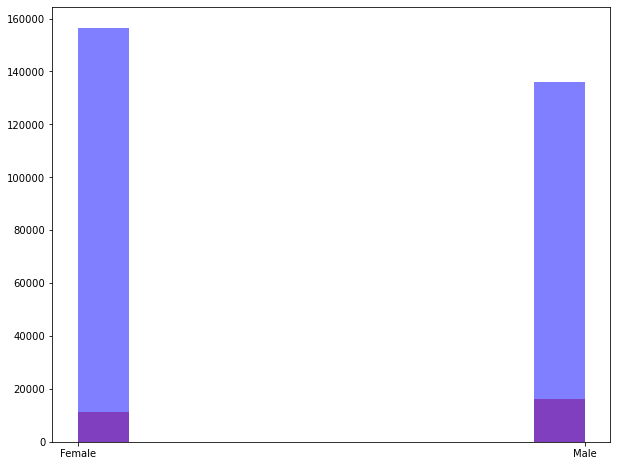

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(df[df["HeartDisease"]==1]['Sex'], alpha=0.5, color='red')
ax.hist(df[df["HeartDisease"]==0]['Sex'], alpha=0.5, color='blue')

(array([284742.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   7680.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

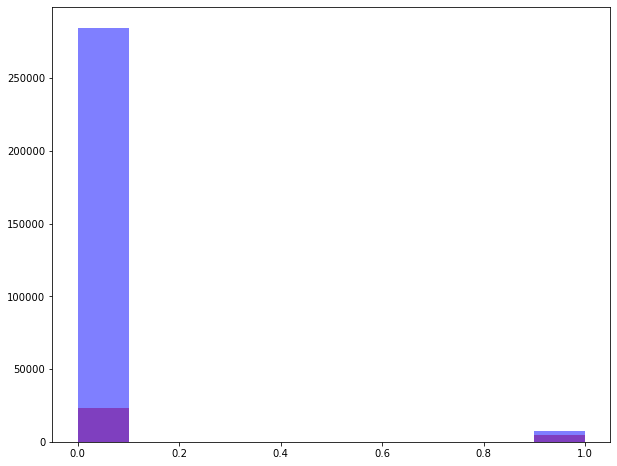

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(df[df["HeartDisease"]==1]['Stroke'], alpha=0.5, color='red')
ax.hist(df[df["HeartDisease"]==0]['Stroke'], alpha=0.5, color='blue')

(array([ 21210.,      0., 222705.,      0.,  10042.,      0.,   4660.,
             0.,   7802.,  26003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

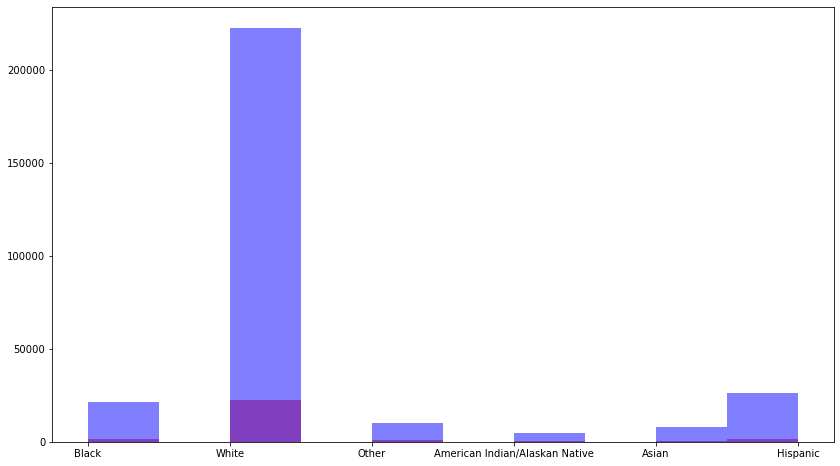

In [9]:
fig, ax = plt.subplots(figsize=(14,8))

ax.hist(df[df["HeartDisease"]==1]['Race'], alpha=0.5, color='red')
ax.hist(df[df["HeartDisease"]==0]['Race'], alpha=0.5, color='blue')

In [10]:
dummies_df = pd.get_dummies(df)

dummies_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [11]:
X = dummies_df.drop(columns='HeartDisease').values
y = dummies_df.HeartDisease.values

print(X)
print(y)

[[16.6   1.    0.   ...  0.    0.    1.  ]
 [20.34  0.    0.   ...  0.    0.    1.  ]
 [26.58  1.    0.   ...  0.    0.    0.  ]
 ...
 [24.24  0.    0.   ...  1.    0.    0.  ]
 [32.81  0.    0.   ...  1.    0.    0.  ]
 [46.56  0.    0.   ...  1.    0.    0.  ]]
[0 0 0 ... 0 0 0]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=39))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3200      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,661
Trainable params: 5,661
Non-trainable params: 0
_________________________________________________________________


In [15]:
nn.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
7496/7496 [==============================] - 6s 707us/step - loss: 0.2299 - accuracy: 0.9149
Epoch 2/100
7496/7496 [==============================] - 5s 697us/step - loss: 0.2256 - accuracy: 0.9159
Epoch 3/100
7496/7496 [==============================] - 5s 701us/step - loss: 0.2247 - accuracy: 0.9165
Epoch 4/100
7496/7496 [==============================] - 5s 702us/step - loss: 0.2241 - accuracy: 0.9165
Epoch 5/100
7496/7496 [==============================] - 5s 701us/step - loss: 0.2236 - accuracy: 0.9166
Epoch 6/100
7496/7496 [==============================] - 5s 700us/step - loss: 0.2233 - accuracy: 0.9165
Epoch 7/100
7496/7496 [==============================] - 5s 697us/step - loss: 0.2228 - accuracy: 0.9168
Epoch 8/100
7496/7496 [==============================] - 5s 698us/step - loss: 0.2223 - accuracy: 0.9171
Epoch 9/100
7496/7496 [==============================] - 5s 692us/step - loss: 0.2221 - accuracy: 0.9171
Epoch 10/100
7496/7496 [==============================]

In [17]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2499/2499 - 1s - loss: 0.2492 - accuracy: 0.9115 - 1s/epoch - 540us/step
Loss: 0.2491724193096161, Accuracy: 0.9114935994148254


In [18]:
clean_df = df.copy()

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [19]:
print(clean_df['Stroke'].value_counts())
print(clean_df['Diabetic'].value_counts())
print(clean_df['SkinCancer'].value_counts())
print(clean_df['KidneyDisease'].value_counts())
print(clean_df['Smoking'].value_counts())
print(clean_df['AlcoholDrinking'].value_counts())

0    307726
1     12069
Name: Stroke, dtype: int64
0    276434
1     43361
Name: Diabetic, dtype: int64
0    289976
1     29819
Name: SkinCancer, dtype: int64
0    308016
1     11779
Name: KidneyDisease, dtype: int64
0    187887
1    131908
Name: Smoking, dtype: int64
0    298018
1     21777
Name: AlcoholDrinking, dtype: int64


In [20]:
clean_df = clean_df.drop(columns = ['Stroke', 'KidneyDisease'])

clean_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,SkinCancer
0,0,16.60,1,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,1
1,0,20.34,0,0,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0
2,0,26.58,1,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0
3,0,24.21,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,1
4,0,23.71,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0


In [21]:
meantalhealth_count = clean_df['MentalHealth'].value_counts()

In [22]:
mentalhealth_to_replace = list(meantalhealth_count[meantalhealth_count < 5000].index)

for phys in mentalhealth_to_replace:
  clean_df['MentalHealth'] = clean_df['MentalHealth'].replace(phys, "Other")

clean_df['MentalHealth'].value_counts()

0.0      205401
30.0      17373
2.0       16495
5.0       14149
10.0      10513
3.0       10466
15.0       9896
Other      9873
1.0        9291
7.0        5528
20.0       5431
4.0        5379
Name: MentalHealth, dtype: int64

In [23]:
physhealth_count = clean_df['PhysicalHealth'].value_counts()

print(physhealth_count)

0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64


In [24]:
physhealth_to_replace = list(physhealth_count[physhealth_count < 5000].index)

for phys in physhealth_to_replace:
  clean_df['PhysicalHealth'] = clean_df['PhysicalHealth'].replace(phys, "Other")

clean_df['PhysicalHealth'].value_counts()

0.0      226589
Other     21640
30.0      19509
2.0       14880
1.0       10489
3.0        8617
5.0        7606
10.0       5453
15.0       5012
Name: PhysicalHealth, dtype: int64

In [25]:
dummies_clean = pd.get_dummies(clean_df)

dummies_clean.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,DiffWalking,Diabetic,PhysicalActivity,SleepTime,Asthma,SkinCancer,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,1,1,5.0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,0,0,1,7.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,1,1,8.0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0,0,6.0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,1,0,1,8.0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
X = dummies_clean.drop(columns='HeartDisease').values
y = dummies_clean.HeartDisease.values

print(X)
print(y)

[[16.6   1.    0.   ...  0.    0.    1.  ]
 [20.34  0.    0.   ...  0.    0.    1.  ]
 [26.58  1.    0.   ...  0.    0.    0.  ]
 ...
 [24.24  0.    0.   ...  1.    0.    0.  ]
 [32.81  0.    0.   ...  1.    0.    0.  ]
 [46.56  0.    0.   ...  1.    0.    0.  ]]
[0 0 0 ... 0 0 0]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=56))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=80, activation="relu"))
nn.add(tf.keras.layers.Dense(units=60, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=30, activation="sigmoid"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               5700      
                                                                 
 dense_9 (Dense)             (None, 80)                8080      
                                                                 
 dense_10 (Dense)            (None, 60)                4860      
                                                                 
 dense_11 (Dense)            (None, 30)                1830      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [33]:
nn.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [34]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
7496/7496 [==============================] - 7s 839us/step - loss: 0.2344 - accuracy: 0.9141
Epoch 2/200
7496/7496 [==============================] - 6s 838us/step - loss: 0.2303 - accuracy: 0.9146
Epoch 3/200
7496/7496 [==============================] - 7s 904us/step - loss: 0.2294 - accuracy: 0.9145
Epoch 4/200
7496/7496 [==============================] - 7s 874us/step - loss: 0.2286 - accuracy: 0.9145
Epoch 5/200
7496/7496 [==============================] - 7s 881us/step - loss: 0.2279 - accuracy: 0.9148
Epoch 6/200
7496/7496 [==============================] - 6s 850us/step - loss: 0.2271 - accuracy: 0.9149
Epoch 7/200
7496/7496 [==============================] - 6s 853us/step - loss: 0.2262 - accuracy: 0.9151
Epoch 8/200
7496/7496 [==============================] - 6s 850us/step - loss: 0.2254 - accuracy: 0.9152
Epoch 9/200
7496/7496 [==============================] - 6s 847us/step - loss: 0.2246 - accuracy: 0.9153
Epoch 10/200
7496/7496 [==============================]

In [35]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2499/2499 - 2s - loss: 0.2526 - accuracy: 0.9147 - 2s/epoch - 614us/step
Loss: 0.2526349425315857, Accuracy: 0.9147206544876099


In [36]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

In [47]:
X = df.drop(columns='HeartDisease')
y = df["HeartDisease"]

In [48]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [49]:
X_dummies = pd.get_dummies(X_ros)

In [50]:
scaler = StandardScaler()

In [51]:
X_scaled = scaler.fit_transform(X_dummies)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ros, random_state = 76)

In [ ]:
# model = RandomForestClassifier()

In [ ]:
# param_grid = {'n_estimators': [100, 200, 500, 750, 1000]}

In [ ]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [ ]:
# grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 500, 750, 1000]})

In [ ]:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

In [ ]:
# accuracy = best_model.score(X_test, y_test)

In [ ]:
# print(accuracy)

0.9640109157313745


In [ ]:
# best_params = grid_search.best_params_
# best_n_estimators = best_params['n_estimators']
# print("Best n_estimators:", best_n_estimators)

Best n_estimators: 100


In [53]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=76)

In [54]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=76)

In [55]:
predictions = rf_model.predict(X_test)

In [56]:
acc_score = accuracy_score(y_test, predictions)

print(acc_score)

0.9642708140974345


In [ ]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(rf_model,f)

In [57]:
X = clean_df.drop(columns='HeartDisease')
y = clean_df["HeartDisease"]

In [58]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [59]:
X_dummies = pd.get_dummies(X_ros)

In [60]:
scaler = StandardScaler()

In [61]:
X_scaled = scaler.fit_transform(X_dummies)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ros, random_state = 76)

In [63]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=76)

In [64]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=76)

In [65]:
predictions = rf_model.predict(X_test)

In [66]:
acc_score = accuracy_score(y_test, predictions)

print(acc_score)

0.9633269726627955


In [ ]:
# import pickle
# with open('model.pkl','wb') as f:
#   pickle.dump(rf_model,f)